![logo](support/images/Header_Logo_0.png)

# The State of JS 2019 (Data Analysis and Visualization)

Created by **Adrián Santuario** (santuario@ciencias.unam.mx)

Usando lo datos de **Kaggle** sobre [**the Satate Of JS 2019**](https://www.kaggle.com/sachag/state-of-js-2019) haré un analisis exploratorio con el fin de encontar una historia interesante que se pueda contar con ellos.

Hoy en dia no hay un proceso standard a la hora de realizar *EDA* (Análisis Exploratorio de Datos), pero un proceso que a mi me gusta está basado en el proceso propuesto por *Distric Data Labs* ([aquí](https://www.youtube.com/watch?v=YEBRkLo568Q) una charla sobre el proceso).

In [1]:
%load_ext watermark
%watermark

2020-02-02T20:44:14-06:00

CPython 3.7.3
IPython 7.4.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


Importaré lo módulos necesarios:

In [2]:
import pandas as pd

In [39]:
import pandas_profiling

In [3]:
import ndjson

In [4]:
import ujson

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import json

### Lectura de Datos

La librería **ndjson** nos deja trabajar con archivos *Newline Delimited JSON* (ndjson), veamos cómo parsea los datos:

In [8]:
with open('data/state_of_js_2019_normalized_responses_anon.ndjson') as f:
    data_js_json = ndjson.load(f)

Véamos qué tipo de variable nos entregó:

In [9]:
type(data_js_json)

list

Veamos, ahora, el primer elemento:

In [11]:
data_js_json[0]

{'survey': 'js',
 'year': 2019,
 'user_info': {'device': 'desktop',
  'backend_proficiency': 2,
  'company_size': '100_1000',
  'css_proficiency': 2,
  'job_title': 'front_end_developer',
  'yearly_salary': '30_50',
  'years_of_experience': '5_10',
  'country': 'DE',
  'gender': 'male',
  'country_name': 'Germany',
  'country_alpha3': 'DEU',
  'hash': 'd4ed064d4757374fbb67aa725236897c3ae85fa5c03a2103da93b4fc7c6b8e15'},
 'browser': 'Chrome',
 'version': '78.0.3904.108',
 'os': 'Windows',
 'source': 'email',
 'createdAt': '2019-11-26T06:43:38.765Z',
 'updatedAt': '2019-11-26T07:02:01.609Z',
 'completion': 82,
 'features': {'arrow_functions': 'heard',
  'destructuring': 'heard',
  'spread_operator': 'neverheard',
  'async_await': 'used',
  'decorators': 'neverheard',
  'promises': 'used',
  'proxies': 'neverheard',
  'array_prototype_flat': 'neverheard',
  'maps': 'used',
  'sets': 'heard',
  'typed_arrays': 'used',
  'fetch': 'heard',
  'i18n': 'used',
  'local_storage': 'used',
  'servi

Para comenzar con el *Análisis Exploratorio* me conviene tener los datos en un *DataFrame* de *Pandas*, por lo que usaré la lbrería *ujson* que me permite tener cada **key** del *json* como una **columna** de mi *DataFrame*

In [13]:
records = map(ujson.loads, open('data/state_of_js_2019_normalized_responses_anon.ndjson'))
data_js_df = pd.DataFrame.from_records(records)

Verifiquemos cuantos *records* tenemos en nuestro *DataFrame*

In [33]:
data_js_df.shape

(21681, 60)

Y veamos el tipo de variables

In [34]:
data_js_df.dtypes

browser                                              object
completion                                          float64
createdAt                                            object
features                                             object
happiness                                            object
opinions                                             object
os                                                   object
other_tools                                          object
patterns                                             object
resources                                            object
sections_other_tools                                 object
source                                               object
survey                                               object
tools                                                object
updatedAt                                            object
user_info                                            object
version                                 

In [14]:
data_js_df.head()

,browser,completion,createdAt,features,happiness,opinions,os,other_tools,patterns,resources,sections_other_tools,source,survey,tools,updatedAt,user_info,version,year
0,Chrome,82.0,2019-11-26T06:43:38.765Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 3, 'front_end_framework...","{'building_js_apps_overly_complex': 2, 'enjoy_...",Windows,"{'browsers': {'choices': ['chrome']}, 'build_t...","{'functional_programming': 'use_neutral', 'obj...",{'blogs_news_magazines': {'choices': ['codrops...,NaN,email,js,{'clojurescript': {'experience': 'never_heard'...,2019-11-26T07:02:01.609Z,"{'device': 'desktop', 'backend_proficiency': 2...",78.0.3904.108,2019
1,Safari,79.0,2019-11-26T03:08:19.839Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 0, 'front_end_framework...","{'building_js_apps_overly_complex': 4, 'enjoy_...",iOS,"{'non_js_languages': {'choices': ['dotnet', 'c...","{'functional_programming': 'use_never', 'objec...",{'sites_courses': {'choices': ['stack_overflow...,NaN,NaN,js,{'clojurescript': {'experience': 'never_heard'...,2019-11-26T03:20:51.230Z,"{'device': 'tablet', 'backend_proficiency': 4,...",13.0.3,2019
2,Firefox,82.0,2019-11-26T05:57:35.931Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 1, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",Linux,"{'browsers': {'choices': ['firefox']}, 'build_...","{'functional_programming': 'use_frequently', '...",{'blogs_news_magazines': {'choices': ['js_week...,"{'javascript_flavors': 'CoffeeScript', 'javasc...",NaN,js,{'clojurescript': {'experience': 'not_interest...,2019-11-26T06:16:03.743Z,"{'device': 'desktop', 'backend_proficiency': 3...",71.0,2019
3,Safari,79.0,2019-11-26T06:04:38.239Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 2, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",iOS,"{'browsers': {'choices': ['chrome']}, 'non_js_...","{'functional_programming': 'use_frequently', '...","{'sites_courses': {'others': 'Traversy', 'choi...",NaN,NaN,js,{'clojurescript': {'experience': 'never_heard'...,2019-11-26T06:20:48.534Z,"{'device': 'mobile', 'backend_proficiency': 0,...",13.0.1,2019
4,Microsoft Edge,6.0,2019-11-26T06:19:57.832Z,"{'arrow_functions': 'used', 'destructuring': '...",NaN,NaN,Windows,NaN,NaN,NaN,NaN,NaN,js,NaN,2019-11-26T06:21:06.238Z,"{'device': 'desktop', 'source_normalized': 'tw...",80.0.334.3,2019


Notemos que el *valor/dato* de algunas columnas aún es un formato *json*, por lo que necesitaré convertir esos **keys** anidados en nuevas **columnas** de mi *DataFrame*

Para empezar, veamos el nombre de los *keys* de la columna **features**:

In [15]:
df['features'][0]

{'arrow_functions': 'heard',
 'destructuring': 'heard',
 'spread_operator': 'neverheard',
 'async_await': 'used',
 'decorators': 'neverheard',
 'promises': 'used',
 'proxies': 'neverheard',
 'array_prototype_flat': 'neverheard',
 'maps': 'used',
 'sets': 'heard',
 'typed_arrays': 'used',
 'fetch': 'heard',
 'i18n': 'used',
 'local_storage': 'used',
 'service_workers': 'used',
 'web_animations': 'heard',
 'web_audio': 'used',
 'web_components': 'used',
 'webgl': 'heard',
 'webrtc': 'neverheard',
 'websocket': 'heard',
 'web_speech': 'heard',
 'webvr': 'neverheard',
 'pwa': 'used',
 'wasm': 'heard'}

Ahora sí, hagamos dicha conversión:

In [16]:
features_df = df['features'].apply(pd.Series)

In [17]:
features_df.head()

,0,array_prototype_flat,arrow_functions,async_await,decorators,destructuring,fetch,i18n,local_storage,maps,...,typed_arrays,wasm,web_animations,web_audio,web_components,web_speech,webgl,webrtc,websocket,webvr
0,NaN,neverheard,heard,used,neverheard,heard,heard,used,used,used,...,used,heard,heard,used,used,heard,heard,neverheard,heard,neverheard
1,NaN,neverheard,heard,heard,neverheard,neverheard,neverheard,neverheard,used,neverheard,...,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard
2,NaN,used,used,used,used,used,used,used,used,used,...,used,used,heard,used,heard,heard,heard,heard,used,heard
3,NaN,neverheard,used,used,neverheard,used,heard,neverheard,neverheard,neverheard,...,heard,heard,neverheard,NaN,neverheard,neverheard,neverheard,neverheard,heard,neverheard
4,NaN,NaN,used,used,neverheard,heard,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cambiaré el nombre de las columnas para que tengan como prefijo el nombre de la columna donde provienen:

In [18]:
features_df = features_df.rename(columns = lambda x : 'features_' + str(x))

In [19]:
features_df.head()

,features_0,features_array_prototype_flat,features_arrow_functions,features_async_await,features_decorators,features_destructuring,features_fetch,features_i18n,features_local_storage,features_maps,...,features_typed_arrays,features_wasm,features_web_animations,features_web_audio,features_web_components,features_web_speech,features_webgl,features_webrtc,features_websocket,features_webvr
0,NaN,neverheard,heard,used,neverheard,heard,heard,used,used,used,...,used,heard,heard,used,used,heard,heard,neverheard,heard,neverheard
1,NaN,neverheard,heard,heard,neverheard,neverheard,neverheard,neverheard,used,neverheard,...,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard
2,NaN,used,used,used,used,used,used,used,used,used,...,used,used,heard,used,heard,heard,heard,heard,used,heard
3,NaN,neverheard,used,used,neverheard,used,heard,neverheard,neverheard,neverheard,...,heard,heard,neverheard,NaN,neverheard,neverheard,neverheard,neverheard,heard,neverheard
4,NaN,NaN,used,used,neverheard,heard,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Y ahora sólo falta incluir éstas nuevas columnas en nuestro *DataFrame* original

In [20]:
data_js_df = pd.concat([data_js_df[:], features_df[:]], axis=1)

In [21]:
data_js_df.head()

,browser,completion,createdAt,features,happiness,opinions,os,other_tools,patterns,resources,...,features_typed_arrays,features_wasm,features_web_animations,features_web_audio,features_web_components,features_web_speech,features_webgl,features_webrtc,features_websocket,features_webvr
0,Chrome,82.0,2019-11-26T06:43:38.765Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 3, 'front_end_framework...","{'building_js_apps_overly_complex': 2, 'enjoy_...",Windows,"{'browsers': {'choices': ['chrome']}, 'build_t...","{'functional_programming': 'use_neutral', 'obj...",{'blogs_news_magazines': {'choices': ['codrops...,...,used,heard,heard,used,used,heard,heard,neverheard,heard,neverheard
1,Safari,79.0,2019-11-26T03:08:19.839Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 0, 'front_end_framework...","{'building_js_apps_overly_complex': 4, 'enjoy_...",iOS,"{'non_js_languages': {'choices': ['dotnet', 'c...","{'functional_programming': 'use_never', 'objec...",{'sites_courses': {'choices': ['stack_overflow...,...,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard,neverheard
2,Firefox,82.0,2019-11-26T05:57:35.931Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 1, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",Linux,"{'browsers': {'choices': ['firefox']}, 'build_...","{'functional_programming': 'use_frequently', '...",{'blogs_news_magazines': {'choices': ['js_week...,...,used,used,heard,used,heard,heard,heard,heard,used,heard
3,Safari,79.0,2019-11-26T06:04:38.239Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 2, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",iOS,"{'browsers': {'choices': ['chrome']}, 'non_js_...","{'functional_programming': 'use_frequently', '...","{'sites_courses': {'others': 'Traversy', 'choi...",...,heard,heard,neverheard,NaN,neverheard,neverheard,neverheard,neverheard,heard,neverheard
4,Microsoft Edge,6.0,2019-11-26T06:19:57.832Z,"{'arrow_functions': 'used', 'destructuring': '...",NaN,NaN,Windows,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data_js_df.columns

Index(['browser', 'completion', 'createdAt', 'features', 'happiness',
       'opinions', 'os', 'other_tools', 'patterns', 'resources',
       'sections_other_tools', 'source', 'survey', 'tools', 'updatedAt',
       'user_info', 'version', 'year', 'features_0',
       'features_array_prototype_flat', 'features_arrow_functions',
       'features_async_await', 'features_decorators', 'features_destructuring',
       'features_fetch', 'features_i18n', 'features_local_storage',
       'features_maps', 'features_promises', 'features_proxies',
       'features_pwa', 'features_service_workers', 'features_sets',
       'features_spread_operator', 'features_typed_arrays', 'features_wasm',
       'features_web_animations', 'features_web_audio',
       'features_web_components', 'features_web_speech', 'features_webgl',
       'features_webrtc', 'features_websocket', 'features_webvr'],
      dtype='object')

Haré el mismo proceso con la columa **user_info**:

In [23]:
user_info_df = df['user_info'].apply(pd.Series)
user_info_df = user_info_df.rename(columns = lambda x : 'user_info_' + str(x))
data_js_df = pd.concat([data_js_df[:], user_info_df[:]], axis=1)

In [24]:
data_js_df.head()

,browser,completion,createdAt,features,happiness,opinions,os,other_tools,patterns,resources,...,user_info_years_of_experience,user_info_country,user_info_gender,user_info_country_name,user_info_country_alpha3,user_info_hash,user_info_how_did_user_find_out_about_the_survey,user_info_source_normalized,user_info_source_pattern,user_info_job_title_other
0,Chrome,82.0,2019-11-26T06:43:38.765Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 3, 'front_end_framework...","{'building_js_apps_overly_complex': 2, 'enjoy_...",Windows,"{'browsers': {'choices': ['chrome']}, 'build_t...","{'functional_programming': 'use_neutral', 'obj...",{'blogs_news_magazines': {'choices': ['codrops...,...,5_10,DE,male,Germany,DEU,d4ed064d4757374fbb67aa725236897c3ae85fa5c03a21...,NaN,NaN,NaN,NaN
1,Safari,79.0,2019-11-26T03:08:19.839Z,"{'arrow_functions': 'heard', 'destructuring': ...","{'javascript_flavors': 0, 'front_end_framework...","{'building_js_apps_overly_complex': 4, 'enjoy_...",iOS,"{'non_js_languages': {'choices': ['dotnet', 'c...","{'functional_programming': 'use_never', 'objec...",{'sites_courses': {'choices': ['stack_overflow...,...,10_20,GB,male,United Kingdom of Great Britain and Northern I...,GBR,24e7e2c71aae744a46f22e996064a3058bc09d92ec7808...,Taken it in previous years,email,/(previous|last|every) (year|survey)/i,NaN
2,Firefox,82.0,2019-11-26T05:57:35.931Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 1, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",Linux,"{'browsers': {'choices': ['firefox']}, 'build_...","{'functional_programming': 'use_frequently', '...",{'blogs_news_magazines': {'choices': ['js_week...,...,5_10,RU,male,Russian Federation,RUS,baf5795d9a638ec62e5f89c297590582,NaN,email,/e?mail/i,NaN
3,Safari,79.0,2019-11-26T06:04:38.239Z,"{'arrow_functions': 'used', 'destructuring': '...","{'javascript_flavors': 2, 'front_end_framework...","{'building_js_apps_overly_complex': 1, 'enjoy_...",iOS,"{'browsers': {'choices': ['chrome']}, 'non_js_...","{'functional_programming': 'use_frequently', '...","{'sites_courses': {'others': 'Traversy', 'choi...",...,less_than_1,US,male,United States of America,USA,7f22c81a01500cd2f80c3926d752343a37715d0be9390d...,NaN,email,/e?mail/i,NaN
4,Microsoft Edge,6.0,2019-11-26T06:19:57.832Z,"{'arrow_functions': 'used', 'destructuring': '...",NaN,NaN,Windows,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4d3934f2c4f18e95340bfa3d1e8bb7b79b1ba608efa427...,NaN,twitter,/https\:\/\/t\.co/i,NaN


In [25]:
data_js_df.columns

Index(['browser', 'completion', 'createdAt', 'features', 'happiness',
       'opinions', 'os', 'other_tools', 'patterns', 'resources',
       'sections_other_tools', 'source', 'survey', 'tools', 'updatedAt',
       'user_info', 'version', 'year', 'features_0',
       'features_array_prototype_flat', 'features_arrow_functions',
       'features_async_await', 'features_decorators', 'features_destructuring',
       'features_fetch', 'features_i18n', 'features_local_storage',
       'features_maps', 'features_promises', 'features_proxies',
       'features_pwa', 'features_service_workers', 'features_sets',
       'features_spread_operator', 'features_typed_arrays', 'features_wasm',
       'features_web_animations', 'features_web_audio',
       'features_web_components', 'features_web_speech', 'features_webgl',
       'features_webrtc', 'features_websocket', 'features_webvr',
       'user_info_device', 'user_info_backend_proficiency',
       'user_info_company_size', 'user_info_css_proficie

In [27]:
data_js_df.dtypes

browser                                              object
completion                                          float64
createdAt                                            object
features                                             object
happiness                                            object
opinions                                             object
os                                                   object
other_tools                                          object
patterns                                             object
resources                                            object
sections_other_tools                                 object
source                                               object
survey                                               object
tools                                                object
updatedAt                                            object
user_info                                            object
version                                 

*Pandas* tiene un dtype especial para variables categoricas llamado `category`. El especificar a *Pandas* que un campo es una categoria en vez de un object (un string generalmente) amplia las funcionalidades que podemos usar. Además, las categorias en general ocupan menos espacio en memoria (si su cardinalidad no es muy elevada).

In [36]:
data_js_df.user_info_country_name = data_js_df.user_info_country_name.astype("category")
data_js_df.user_info_gender = data_js_df.user_info_gender.astype("category")
data_js_df.user_info_country = data_js_df.user_info_country.astype("category")
data_js_df.user_info_years_of_experience = data_js_df.user_info_years_of_experience.astype("category")
data_js_df.user_info_yearly_salary = data_js_df.user_info_yearly_salary.astype("category")
data_js_df.user_info_job_title = data_js_df.user_info_job_title.astype("category")
data_js_df.user_info_company_size = data_js_df.user_info_company_size.astype("category")
data_js_df.features_webvr = data_js_df.features_webvr.astype("category")
data_js_df.features_array_prototype_flat = data_js_df.features_array_prototype_flat.astype("category")
data_js_df.features_arrow_functions = data_js_df.features_arrow_functions.astype("category")
data_js_df.features_async_await = data_js_df.features_async_await.astype("category")
data_js_df.features_decorators = data_js_df.features_decorators.astype("category")
data_js_df.features_destructuring = data_js_df.features_destructuring.astype("category")
data_js_df.features_fetch = data_js_df.features_fetch.astype("category")
data_js_df.features_i18n = data_js_df.features_i18n.astype("category")
data_js_df.features_local_storage = data_js_df.features_local_storage.astype("category")
data_js_df.features_maps = data_js_df.features_maps.astype("category")
data_js_df.features_promises = data_js_df.features_promises.astype("category")
data_js_df.features_proxies = data_js_df.features_proxies.astype("category")
data_js_df.features_pwa = data_js_df.features_pwa.astype("category")
data_js_df.features_service_workers = data_js_df.features_service_workers.astype("category")
data_js_df.features_sets = data_js_df.features_sets.astype("category")
data_js_df.features_spread_operator = data_js_df.features_spread_operator.astype("category")
data_js_df.features_typed_arrays = data_js_df.features_typed_arrays.astype("category")
data_js_df.features_wasm = data_js_df.features_wasm.astype("category")
data_js_df.features_web_animations = data_js_df.features_web_animations.astype("category")
data_js_df.features_web_audio = data_js_df.features_web_audio.astype("category")
data_js_df.features_web_components = data_js_df.features_web_components.astype("category")
data_js_df.features_web_speech = data_js_df.features_web_speech.astype("category")
data_js_df.features_webgl = data_js_df.features_webgl.astype("category")
data_js_df.features_webrtc = data_js_df.features_webrtc.astype("category")
data_js_df.features_websocket = data_js_df.features_websocket.astype("category")

Veamos dónde viven las personas que contestaron la encuesta:

In [37]:
data_js_df.user_info_country_name.value_counts()

United States of America                                4509
United Kingdom of Great Britain and Northern Ireland    1227
France                                                  1056
Germany                                                  976
Canada                                                   757
Russian Federation                                       642
Poland                                                   575
Brazil                                                   552
India                                                    548
Netherlands                                              535
Spain                                                    515
Australia                                                456
Sweden                                                   427
Ukraine                                                  402
China                                                    247
Italy                                                    246
Belgium                 

Veamos ahora el género:

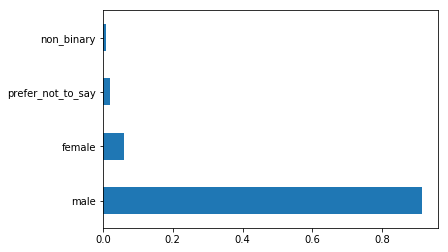

In [29]:
data_js_df.user_info_gender.value_counts(normalize=True).plot.barh();

¿Qué sucede con su experiencia?

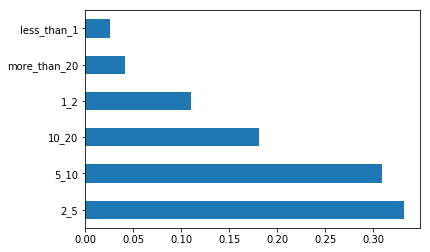

In [30]:
data_js_df.user_info_years_of_experience.value_counts(normalize=True).plot.barh();

¿Qué trabajo ostentan?

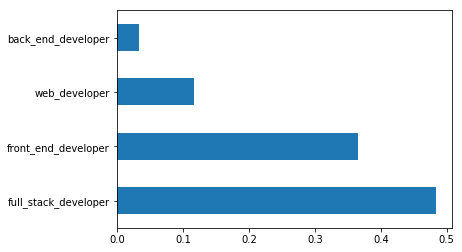

In [31]:
data_js_df.user_info_job_title.value_counts(normalize=True).plot.barh();

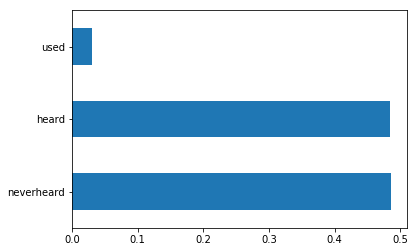

In [38]:
data_js_df.features_webvr.value_counts(normalize=True).plot.barh();

Veamos un perfil completo de los datos:

In [40]:
pandas_profiling.ProfileReport(data_js_df)

Number of variables,60
Number of observations,21681
Total Missing (%),12.9%
Total size in memory,5.4 MiB
Average record size in memory,258.8 B
Numeric,3
Categorical,44
Boolean,0
Date,0
Text (Unique),1
Rejected,3


Quisera ver de todos los *features* cuáles son los que menos se han usado

In [47]:
features_df.features_webvr.value_counts()

neverheard    9876
heard         9841
used           620
Name: features_webvr, dtype: int64

In [51]:
features_count_df = features_df.apply(pd.Series.value_counts)
features_count_df

,features_0,features_array_prototype_flat,features_arrow_functions,features_async_await,features_decorators,features_destructuring,features_fetch,features_i18n,features_local_storage,features_maps,...,features_typed_arrays,features_wasm,features_web_animations,features_web_audio,features_web_components,features_web_speech,features_webgl,features_webrtc,features_websocket,features_webvr
heard,NaN,8397,455,2224,7778,1763,2312,8035,2103,4840,...,7274,15250,10569,11806,12453,9532,13951,9402,6878,9841
neverheard,NaN,6691,171,185,5135,1372,1455,3852,347,1219,...,7494,3620,6884,4357,2258,9295,2985,8713,1439,9876
used,NaN,5515,20336,18363,7883,17864,16646,8476,17918,14533,...,5768,1444,2886,4184,5637,1528,3398,2210,12048,620


In [60]:
most_used_row = features_count_df.iloc[2]
most_used_row

features_0                           NaN
features_array_prototype_flat     5515.0
features_arrow_functions         20336.0
features_async_await             18363.0
features_decorators               7883.0
features_destructuring           17864.0
features_fetch                   16646.0
features_i18n                     8476.0
features_local_storage           17918.0
features_maps                    14533.0
features_promises                19465.0
features_proxies                  3601.0
features_pwa                      9787.0
features_service_workers          7366.0
features_sets                    11602.0
features_spread_operator         18719.0
features_typed_arrays             5768.0
features_wasm                     1444.0
features_web_animations           2886.0
features_web_audio                4184.0
features_web_components           5637.0
features_web_speech               1528.0
features_webgl                    3398.0
features_webrtc                   2210.0
features_websock

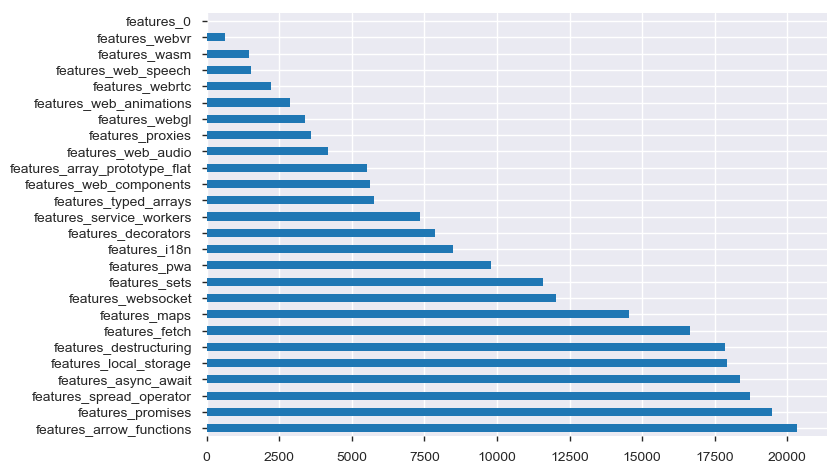

In [62]:
most_used_row = most_used_row.sort_values(ascending=False)
most_used_row.plot(kind='barh')

La pregunta que me surge: ¿Habrá un *feature* del que todos han escuchado pero del que menos han usado?

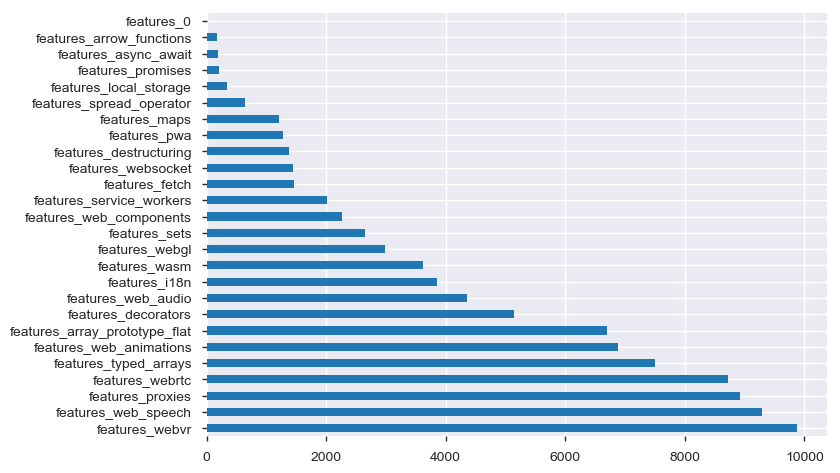

In [63]:
neverheard = features_count_df.iloc[1]
neverheard = neverheard.sort_values(ascending=False)
neverheard.plot(kind='barh')

Calculemos el porcentaje de *WebVR* para ambos casos: 

In [69]:
neverheard_webvr_p = features_df.features_webvr.value_counts()[0]*100/data_js_df.shape[0]
neverheard_webvr_p

45.551404455514046

In [70]:
used_webvr_p = features_df.features_webvr.value_counts()[2]*100/data_js_df.shape[0]
used_webvr_p

2.8596466952631334